In [3]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

import requests

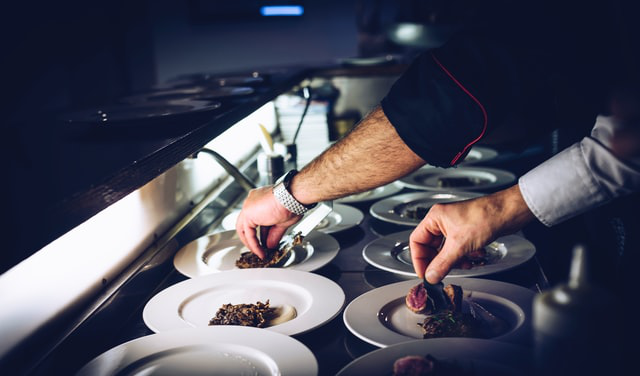

In [164]:
image_url = 'https://unsplash.com/photos/boaDpmC-_Xo/download?ixid=MnwxMjA3fDB8MXxhbGx8MXx8fHx8fDJ8fDE2MzQ2ODI0MzQ&force=true&w=640'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert()
image
#url = 'https://unsplash.com/photos/boaDpmC-_Xo/download?ixid=MnwxMjA3fDB8MXxhbGx8MXx8fHx8fDJ8fDE2MzQ2ODI0MzQ&force=true&w=640'
#response = requests.get(url)
#image = Image.open(BytesIO(response.content)).convert()
#image

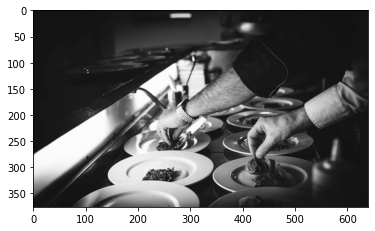

In [172]:
img_arr = np.copy(image)
# img_arr.shape
img_gray_average = np.mean(img_arr, axis=2)

# img_gray_average

plt.imshow(img_gray_average, cmap='gray')
plt.show()

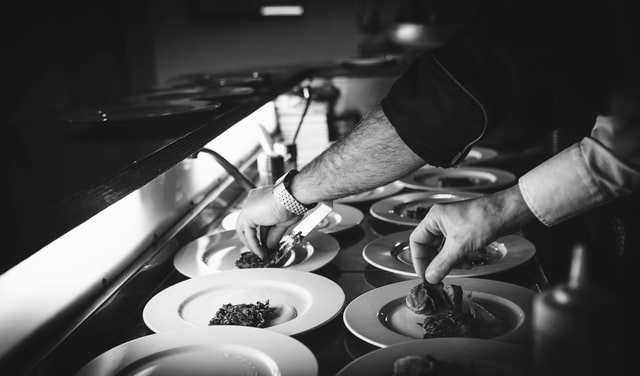

In [157]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

# **Luminance Perception**




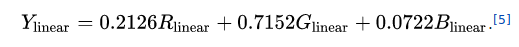

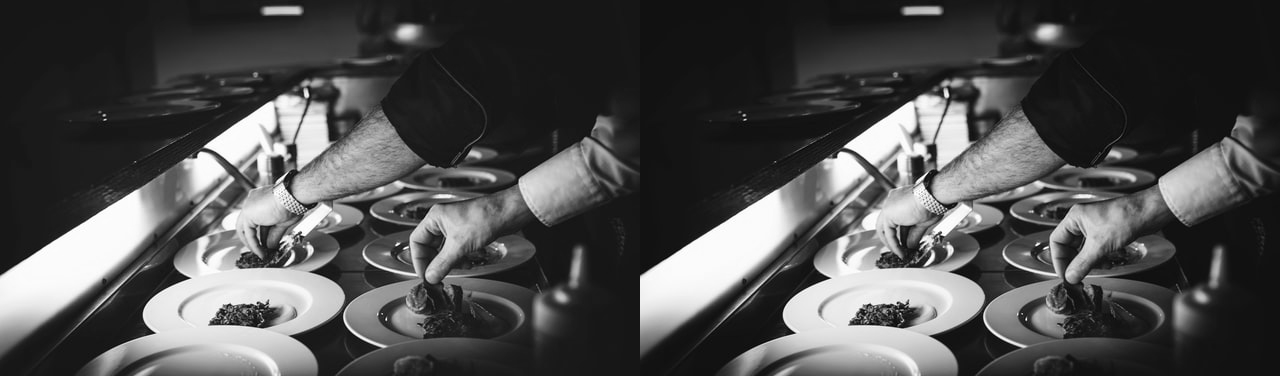

In [158]:
img_lumPer = np.copy(image)

img_ = img_lumPer[:,:,0] * 0.2126 + img_lumPer[:,:,1] * 0.7152 + img_lumPer[:,:,2] * 0.0722

img_lumPer[:,:,0] = img_
img_lumPer[:,:,1] = img_
img_lumPer[:,:,2] = img_

concat_lumPer = np.array(np.concatenate((new_img_gray_average,img_lumPer), axis=1), dtype=np.uint8)
imgLumPer = Image.fromarray(concat_lumPer)
imgLumPer

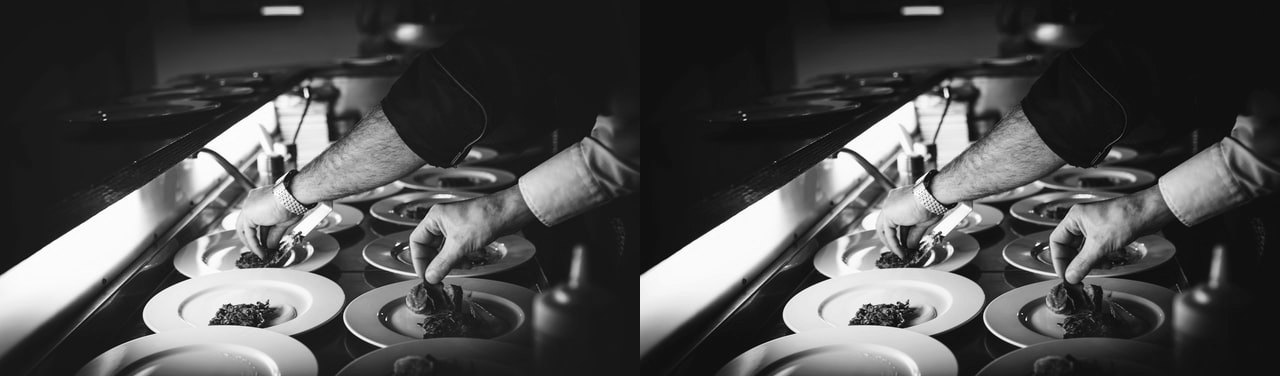

In [159]:
pesos = [0.2126, 0.7152, 0.0722]
#red: 0,2126 ; green: 0,7152 ; blue: 0,0722

img_arr = np.copy(image)

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(concat)
img_ones

# **Gamma Compression**

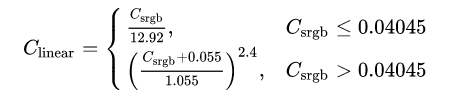

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


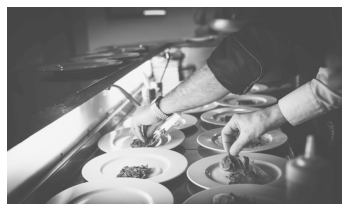

In [177]:
index = np.asarray(img_lumPer).copy()
img_compGamma = index.copy()/255

if img_compGamma[:,:,:].any() <= 0.0031308:
  img_compGamma[:,:,:] = img_compGamma[:,:,:] * 12.92
else:
  img_compGamma[:,:,:] = ((img_compGamma[:,:,:] * 1.055)**(1/2.4)) - 0.055

plt.imshow(img_compGamma)
plt.axis('off')
plt.show()

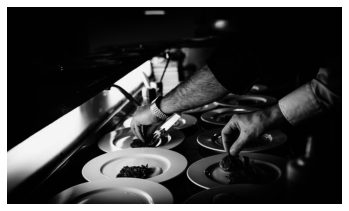

In [178]:
y = np.asarray(img_lumPer).copy()
img_compGamma2 = y.copy()/255

if img_compGamma2[:,:,:].any() <= 0.0031308:
  img_compGamma2[:,:,:] = img_compGamma2[:,:,:] / 12.92
else:
  img_compGamma2[:,:,:] = ((img_compGamma2[:,:,:] + 0.055)/ 1.055)**2.4 

plt.imshow(img_compGamma2)
plt.axis('off')
plt.show()

# **Aproximação Linear**

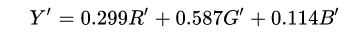

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


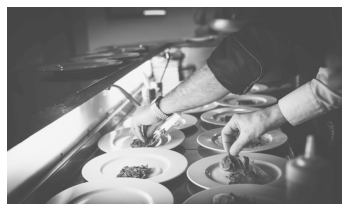

In [179]:
pesos = [0.299, 0.587, 0.114]

img_aproxLin = np.copy(img_compGamma)

img_ = img_aproxLin[:,:,0] * 0.299 + img_aproxLin[:,:,1] * 0.587 + img_aproxLin[:,:,2] * 0.114

img_aproxLin[:,:,0] = img_
img_aproxLin[:,:,1] = img_
img_aproxLin[:,:,2] = img_

plt.imshow(img_aproxLin)
plt.axis('off')
plt.show()

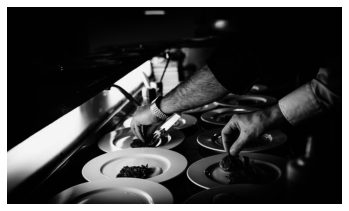

In [180]:
pesos = [0.299, 0.587, 0.114]

img_aproxLin = np.copy(img_compGamma2)

img_ = img_aproxLin[:,:,0] * 0.299 + img_aproxLin[:,:,1] * 0.587 + img_aproxLin[:,:,2] * 0.114

img_aproxLin[:,:,0] = img_
img_aproxLin[:,:,1] = img_
img_aproxLin[:,:,2] = img_

plt.imshow(img_aproxLin)
plt.axis('off')
plt.show()